In [3]:
#Import needed packages

import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.ensemble
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from matplotlib.dates import MonthLocator

In [4]:
#Load the dataset

Dataset = pd.read_csv('Data/superstore_data.csv')
print(Dataset.shape)
Dataset.head()
#make new dummy columns for the education and martial status value 
Dataset_dummy = pd.get_dummies(Dataset[['Marital_Status','Education']])

Dataset = pd.concat([Dataset,Dataset_dummy],axis=1)

Income_missing = Dataset[Dataset['Income'].isna()]
Rm_data = Dataset.dropna()
print(Rm_data.shape)
print(Income_missing.shape)

Income_missing.head()


(2240, 22)
(2216, 35)
(24, 35)


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
134,8996,1957,PhD,Married,NaN,2,1,11/19/2012,4,230,...,True,False,False,False,False,False,False,False,False,True
262,1994,1983,Graduation,Married,NaN,1,0,11/15/2013,11,5,...,True,False,False,False,False,False,False,True,False,False
394,3769,1972,PhD,Together,NaN,1,0,2/3/2014,17,25,...,False,False,True,False,False,False,False,False,False,True
449,5255,1986,Graduation,Single,NaN,1,0,2/20/2013,19,5,...,False,True,False,False,False,False,False,True,False,False
525,8268,1961,PhD,Married,NaN,0,1,11/7/2013,23,352,...,True,False,False,False,False,False,False,False,False,True


In [5]:
#Part 1) Train a method to impute the data from the column, train a random forest regressor for the income informaiton

impute_targ = Rm_data['Income']
impute_input = Rm_data.drop(columns=['Income','Dt_Customer','Marital_Status','Education'])

RandForest = sk.ensemble.RandomForestRegressor(n_estimators=200,random_state=1)

forest = RandForest.fit(impute_input,impute_targ)


#Impute the values for the missing cells and put it back into the dataset

impute_x = Income_missing.drop(columns=['Income','Dt_Customer','Marital_Status','Education'])
imputed_income = forest.predict(impute_x)

print(imputed_income)
#put this into the dataset
u = 0
for i in range(len(Dataset['Income'])):
    if pd.isna(Dataset['Income'][i]):
        Dataset['Income'][i] = imputed_income[u]
        u+= 1

Dataset['Edu_Cat'] = Dataset['Education'].astype('category').cat.codes
Dataset['Mat_Cat'] = Dataset['Marital_Status'].astype('category').cat.codes
Dataset.to_csv('Data/Imputed_Income.csv')

list_nan = Dataset[Dataset['Income'].isna()]
print(list_nan)
print('I finished')
#See the new dataset
Dataset.head()


[ 51078.355  29216.59   36802.655  81778.445  56609.535  24289.62
  50754.065  33256.42   30508.015  59731.215 126175.41   28259.065
  61559.22   74401.135  79679.62   50848.085  35094.985  40814.03
  50634.985  73667.825  40992.895  48684.175  44212.2    66019.515]
Empty DataFrame
Columns: [Id, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain, Marital_Status_Absurd, Marital_Status_Alone, Marital_Status_Divorced, Marital_Status_Married, Marital_Status_Single, Marital_Status_Together, Marital_Status_Widow, Marital_Status_YOLO, Education_2n Cycle, Education_Basic, Education_Graduation, Education_Master, Education_PhD, Edu_Cat, Mat_Cat]
Index: []

[0 rows x 37 columns]
I finished


C:\Users\chees\AppData\Local\Temp\ipykernel_16080\4219940203.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Income'][i] = imputed_income[u]
C:\Users\chees\AppData\Local\Temp\ipykernel_16080\4219940203.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Income'][i] = imputed_income[u]
C:\Users\chees\AppData\Local\Temp\ipykernel_16080\4219940203.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Income

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Edu_Cat,Mat_Cat
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,False,False,False,False,False,True,False,False,2,2
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,False,False,False,False,False,True,False,False,2,4
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,False,False,False,False,False,True,False,False,2,3
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,True,False,False,False,False,True,False,False,2,5
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,False,False,False,False,False,True,False,False,2,4


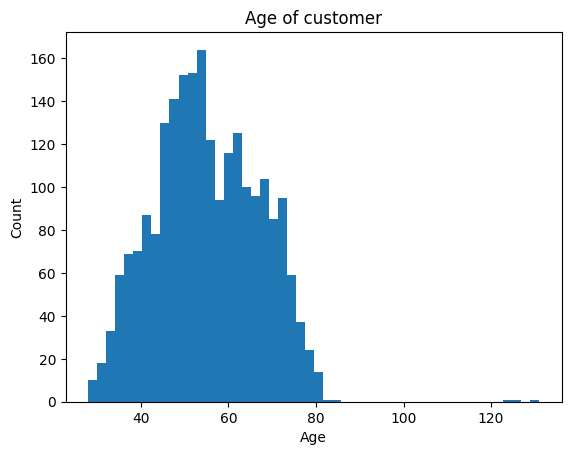

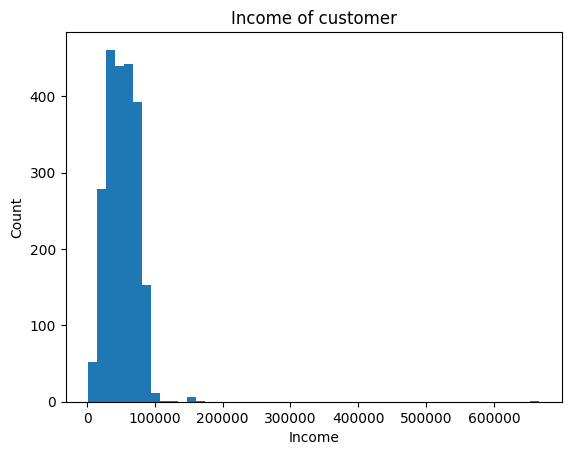

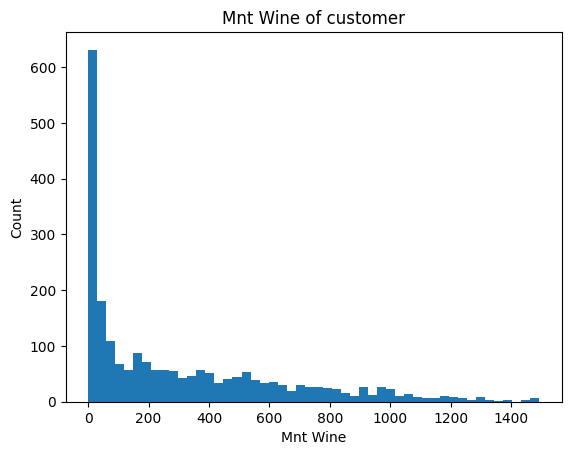

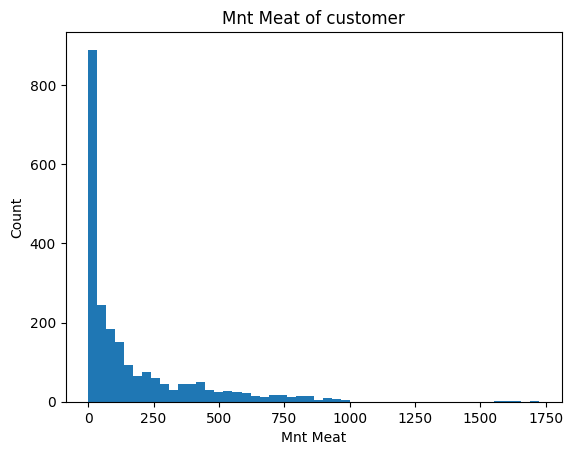

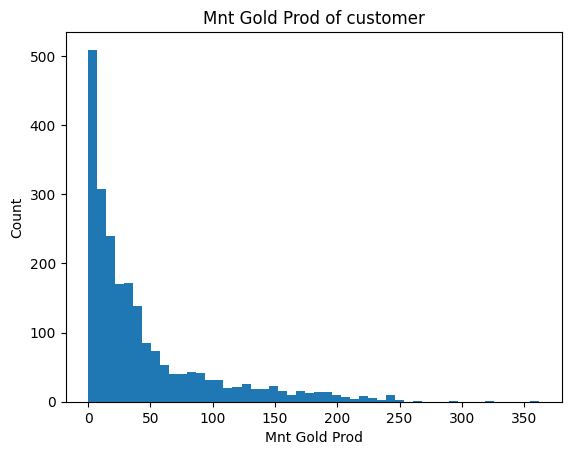

In [6]:
#Part 2) Explore the distributions

#Make histrograms of the data, display mean etc

def plot_histogram(data, bins=10, xlabel='Value', ylabel='Frequency', title='Histogram',savename='basename.png'):
    plt.figure()
    plt.hist(data, bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig('Figures/'+savename,dpi=200)

#Age
AGE = 2024-Dataset['Year_Birth']
plot_histogram(AGE,bins=50,xlabel='Age',ylabel='Count',title='Age of customer',savename='AgeHist.png')
#Income
Income = Dataset['Income']
plot_histogram(Income,bins=50,xlabel='Income',ylabel='Count',title='Income of customer',savename='Income.png')
#Wine
Wine = Dataset['MntWines']
plot_histogram(Wine,bins=50,xlabel='Mnt Wine',ylabel='Count',title='Mnt Wine of customer',savename='Wine.png')

#Meat
Meat = Dataset['MntMeatProducts']
plot_histogram(Meat,bins=50,xlabel='Mnt Meat',ylabel='Count',title='Mnt Meat of customer',savename='Meat.png')

#Gold Prods
GoldProd = Dataset['MntGoldProds']
plot_histogram(GoldProd,bins=50,xlabel='Mnt Gold Prod',ylabel='Count',title='Mnt Gold Prod of customer',savename='Gold.png')



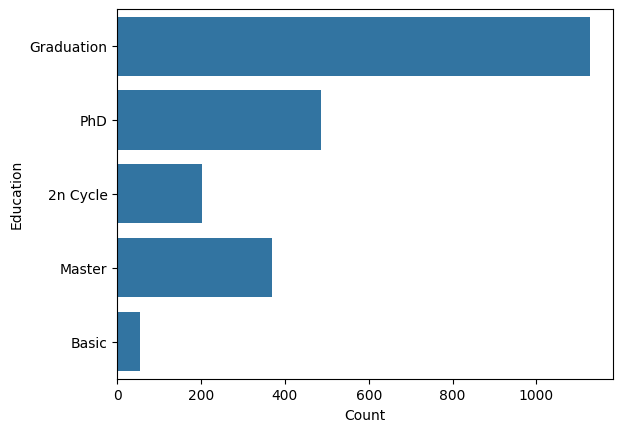

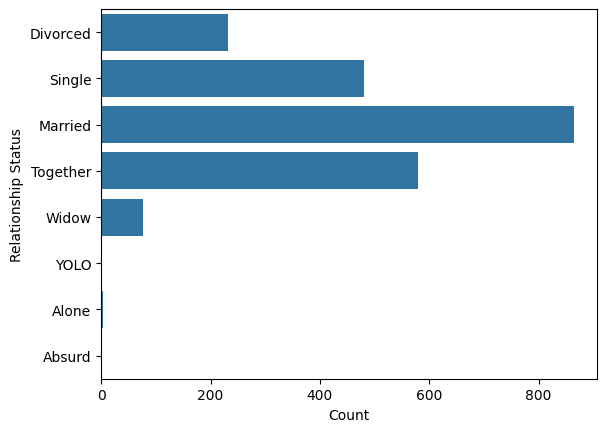

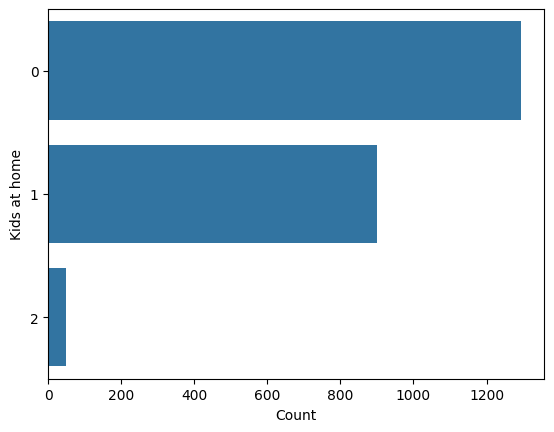

In [7]:

#Part 3 distribution of categorical variables Education, marital status

#Barplot

def plot_barplot(data, xlabel='Count', ylabel='Catergory', title='Bar Plot',savename='barbase.png'):
    plt.figure()
    sns.countplot(data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig('Figures/'+savename,dpi=200)

#Education
Education = Dataset['Education']
Mat_Status = Dataset['Marital_Status']
TeenHome = Dataset['Teenhome'].astype('str')
plot_barplot(Education,ylabel='Education',title=None,savename='Education_bar.png')

#Marital status
plot_barplot(Dataset['Marital_Status'],ylabel='Relationship Status',title=None,savename='Marital_Status.png')

#Kids at home
plot_barplot(Dataset['Kidhome'].astype('str'),ylabel='Kids at home',title=None,savename='Kids_home.png')


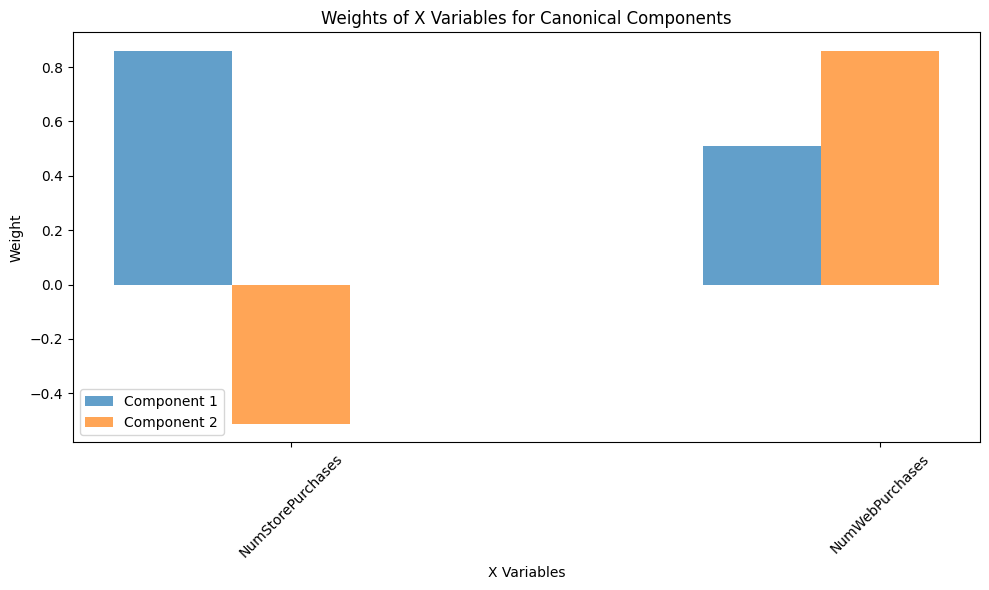

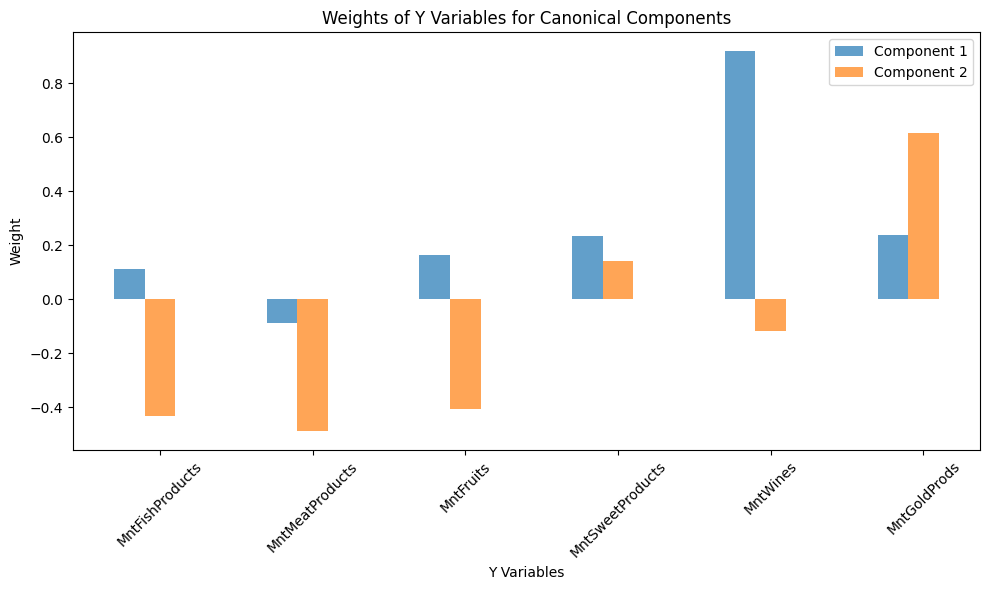

In [8]:
#Part 4) Relationship betwen number of purchases and ammount spent on different produces, do CCA

import sklearn.cross_decomposition as skcd

def cca_and_plot_weights(X_mat, Y_mat, x_labels, y_labels,num_comp=2, x_output_file='Problem2_part4_X.png', y_output_file='Problem2_part4_Y.png'):
    # Perform Canonical Correlation Analysis (CCA)
    cca = skcd.CCA(n_components=num_comp)
    cca.fit(X_mat, Y_mat)

    # Get the weights
    x_weights = cca.x_weights_
    y_weights = cca.y_weights_

    # Plot weights for X variables
    plt.figure(figsize=(10, 6))
    bar_width = 0.2

    for i in range(x_weights.shape[1]):
        plt.bar(np.arange(len(x_weights)) + (i - 1) * bar_width, x_weights[:, i], bar_width, alpha=0.7, label=f'Component {i+1}')

    plt.xlabel('X Variables')
    plt.ylabel('Weight')
    plt.title('Weights of X Variables for Canonical Components')
    plt.xticks(np.arange(len(x_weights)), x_labels, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.savefig('Figures/'+x_output_file, dpi=200)

    # Plot weights for Y variables
    plt.figure(figsize=(10, 6))

    for i in range(y_weights.shape[1]):
        plt.bar(np.arange(len(y_weights)) + (i - 1) * bar_width, y_weights[:, i], bar_width, alpha=0.7, label=f'Component {i+1}')

    plt.xlabel('Y Variables')
    plt.ylabel('Weight')
    plt.title('Weights of Y Variables for Canonical Components')
    plt.xticks(np.arange(len(y_weights)), y_labels, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.savefig('Figures/'+y_output_file, dpi=200)
    plt.show()

#Matrix for the number of purchases
Purchases = Dataset[['NumStorePurchases','NumWebPurchases']]
Mnt_spent = Dataset[['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds']]

xlist = ['NumStorePurchases','NumWebPurchases']
ylist = ['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds']
cca_and_plot_weights(Purchases,Mnt_spent,x_labels=xlist,y_labels=ylist,x_output_file='Purchase_X.png',y_output_file='Purchase_Y.png')



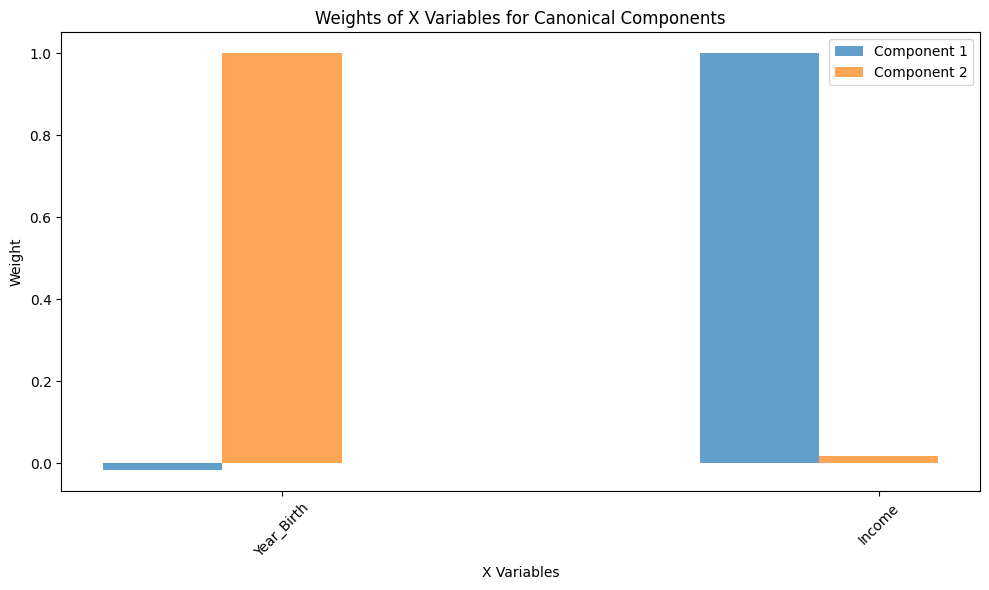

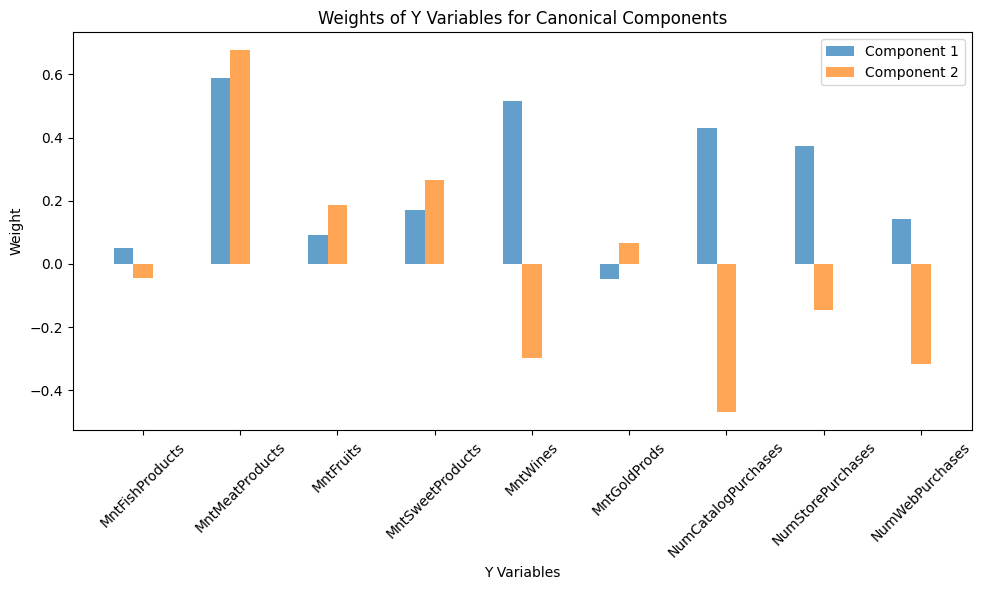

In [9]:
#Part 5 doing CCA on demographic and thier purchasing behavior

xlist = ['Year_Birth','Income']
ylist = ['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds','NumCatalogPurchases','NumStorePurchases','NumWebPurchases']
#Matrix for the number of purchases
Demo = Dataset[['Year_Birth','Income']]
SpeningHab = Dataset[['MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds','NumCatalogPurchases','NumStorePurchases','NumWebPurchases']]


cca_and_plot_weights(Demo,SpeningHab,x_labels=xlist,y_labels=ylist,num_comp=2,x_output_file='Demographic_X.png',y_output_file='Demographic_Y.png')


In [10]:
#Part 6 Visualizing and coloring by catergoical values, I choose to use UMAP for this

#Standarize the dataset

from sklearn.preprocessing import StandardScaler
arrlen = len(Dataset.MntFishProducts)

scale = StandardScaler()
#Standarizing the continouse values
df = Dataset
contvarlist = ['Year_Birth','Income','MntFishProducts','MntMeatProducts','MntFruits','MntSweetProducts','MntWines','MntGoldProds','NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases','NumWebVisitsMonth','Recency']
for i in contvarlist:
    df[i] = scale.fit_transform(np.asarray(df[i]).reshape([arrlen,1]))




In [11]:

#Do UMAP on the df to get the visualization
df = df[contvarlist]
reduction = umap.UMAP()

embedding = reduction.fit_transform(df,)


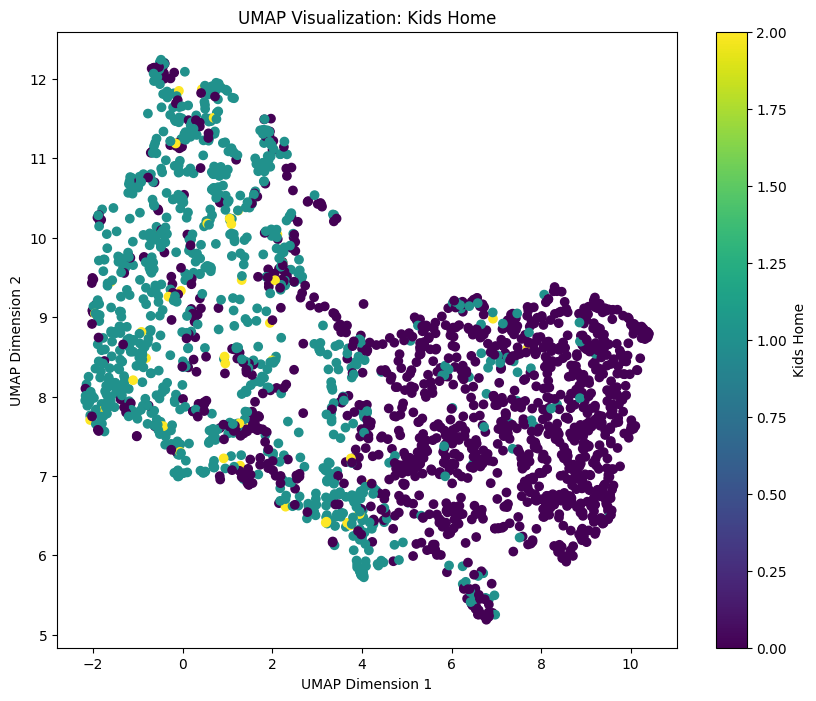

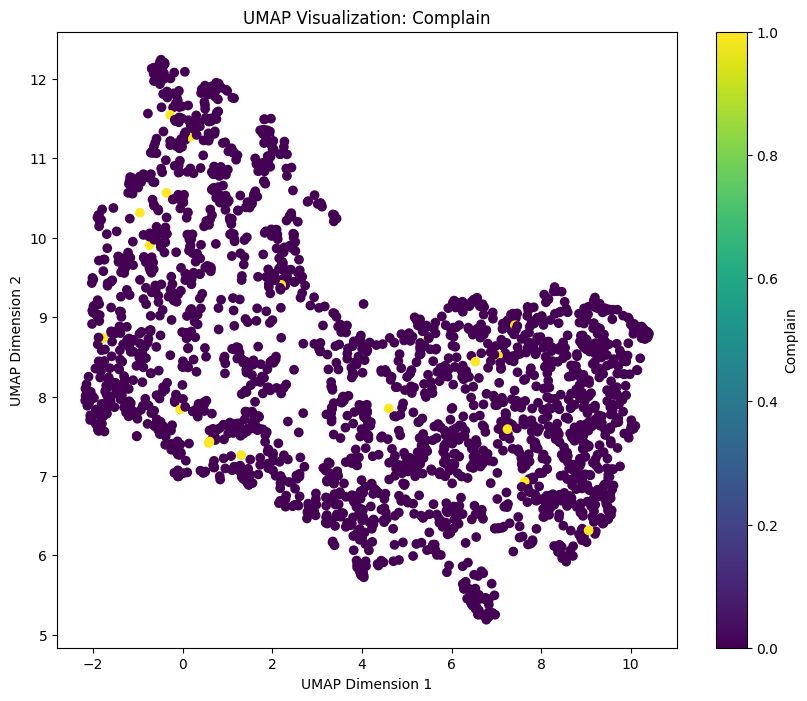

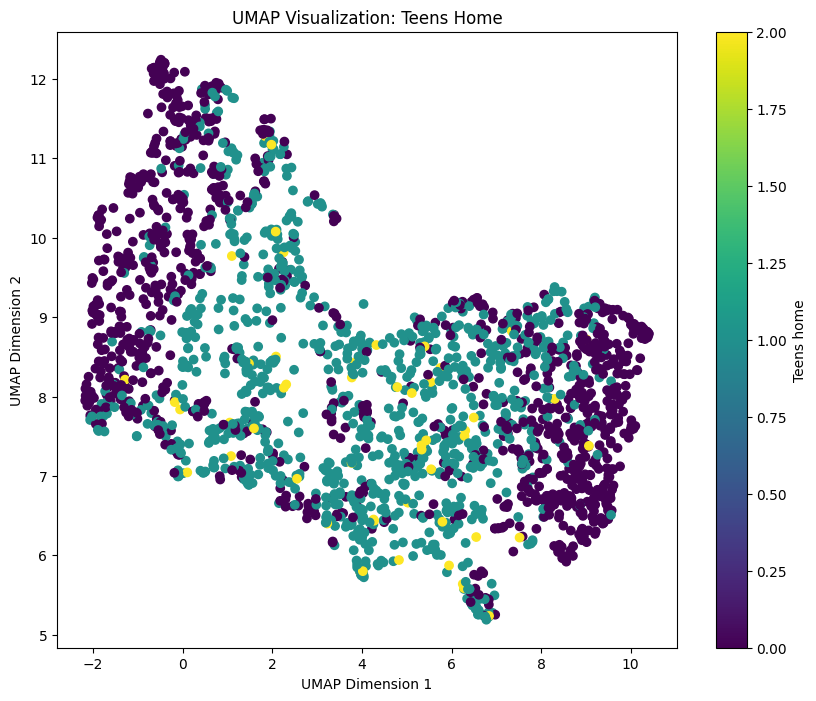

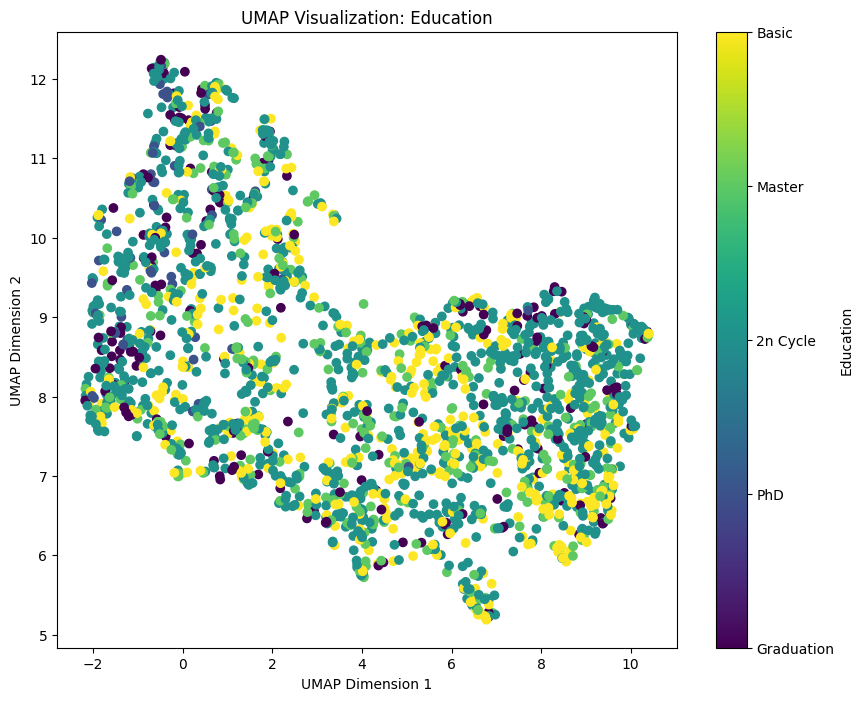

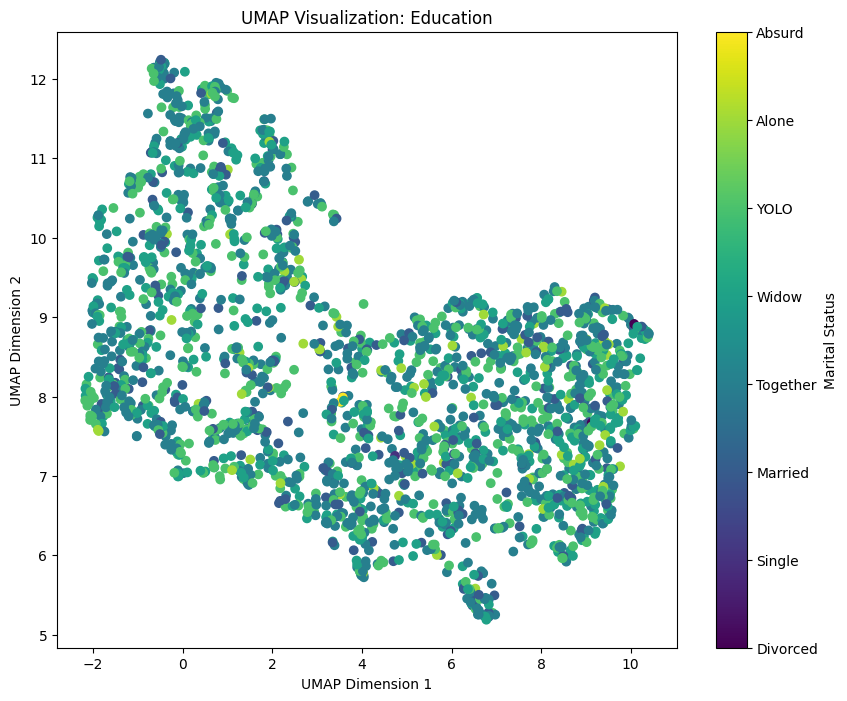

In [12]:

#show the embedding
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=Dataset['Kidhome'], cmap='viridis')
plt.colorbar(label='Kids Home')
plt.title('UMAP Visualization: Kids Home')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.savefig('Figures/UMAP_Kidhome.png',dpi=200)

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=Dataset['Complain'], cmap='viridis')
plt.colorbar(label='Complain')
plt.title('UMAP Visualization: Complain')
plt.xlabel('UMAP Dimension 1') 
plt.ylabel('UMAP Dimension 2')
plt.savefig('Figures/UMAP_Complain.png',dpi=200)

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=Dataset['Teenhome'], cmap='viridis')
plt.colorbar(label='Teens home')
plt.title('UMAP Visualization: Teens Home')
plt.xlabel('UMAP Dimension 1') 
plt.ylabel('UMAP Dimension 2')
plt.savefig('Figures/UMAP_Teens Home.png',dpi=200)

#Education
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=Dataset['Education'].astype('category').cat.codes, cmap='viridis')
cb = plt.colorbar(label='Education',ticks=np.unique(Dataset['Education'].astype('category').cat.codes))
cb.ax.set_yticklabels(Dataset['Education'].unique())
plt.title('UMAP Visualization: Education')
plt.xlabel('UMAP Dimension 1') 
plt.ylabel('UMAP Dimension 2')
plt.savefig('Figures/UMAP_Education.png',dpi=200)


#matrial Status
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=Dataset['Marital_Status'].astype('category').cat.codes, cmap='viridis')
cb = plt.colorbar(label='Marital Status',ticks=np.unique(Dataset['Marital_Status'].astype('category').cat.codes))
cb.ax.set_yticklabels(Dataset['Marital_Status'].unique())
plt.title('UMAP Visualization: Education')
plt.xlabel('UMAP Dimension 1') 
plt.ylabel('UMAP Dimension 2')
plt.savefig('Figures/UMAP_MaritalStatus.png',dpi=200)



C:\Users\chees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


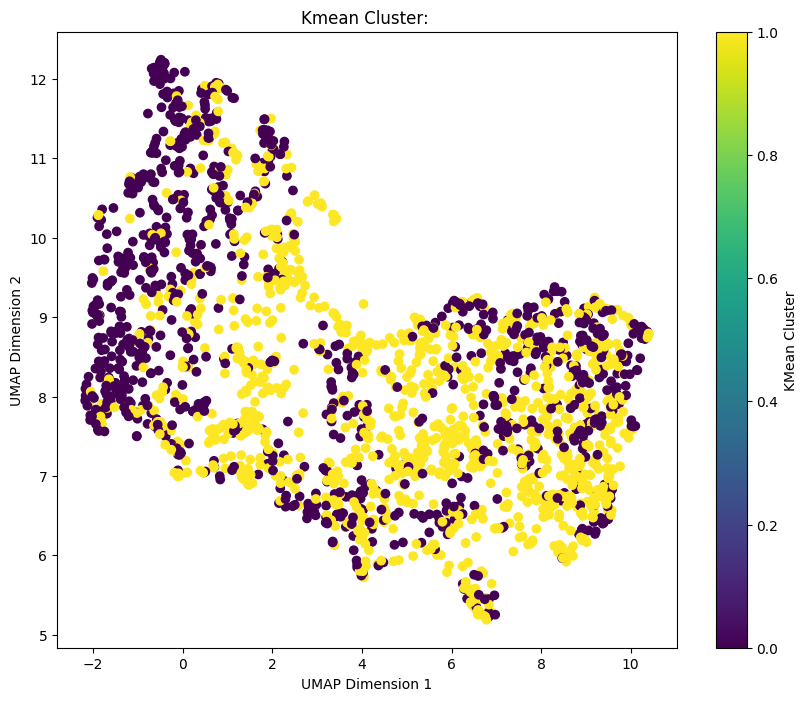

In [13]:
#Part 2.7 K means clustering

from sklearn.cluster import KMeans

#standarize dummy year birth and income to give better clusters
Dataset_dummy = Dataset
Dataset_dummy['Year_Birth'] = scale.fit_transform(np.asarray(Dataset['Year_Birth']).reshape([arrlen,1]))
Dataset_dummy['Income'] = scale.fit_transform(np.asarray(Dataset['Income']).reshape([arrlen,1]))

kmeans = KMeans(n_clusters=2,random_state=1)

clusters = kmeans.fit_predict(Dataset_dummy[['Year_Birth','Edu_Cat','Income','Mat_Cat']])

Dataset['Cluster_Cat'] = clusters

#visualize
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=Dataset['Cluster_Cat'], cmap='viridis')
plt.colorbar(label='KMean Cluster')
plt.title('Kmean Cluster: ')
plt.xlabel('UMAP Dimension 1') 
plt.ylabel('UMAP Dimension 2')
plt.savefig('Figures/KMeans_Cat.png',dpi=200)


In [14]:
#2.8 Trend of NumWebVisitsMonth 

Dataset = pd.read_csv('Data/superstore_data.csv')
print(Dataset.shape)
Dataset.head()
#make new dummy columns for the education and martial status value 
Dataset_dummy = pd.get_dummies(Dataset[['Marital_Status','Education']])

Dataset = pd.concat([Dataset,Dataset_dummy],axis=1)

# Convert 'Dt_Customer' to datetime
Dataset['Dt_Customer'] = pd.to_datetime(Dataset['Dt_Customer'])

# Extract month and year from 'Dt_Customer'
Dataset['Enrollment_Month'] = Dataset['Dt_Customer'].dt.month
Dataset['Enrollment_Year'] = Dataset['Dt_Customer'].dt.year
Dataset['Enrollment_Day'] = Dataset['Dt_Customer'].dt.day
u = 0
for i in range(len(Dataset['Income'])):
    if pd.isna(Dataset['Income'][i]):
        Dataset['Income'][i] = imputed_income[u]
        u+= 1




#sort Dataset by enrollment
Dataset.sort_values(by='Dt_Customer',inplace=True)
Dataset = Dataset.reset_index()

# user_count = Dataset.groupby(['Enrollment_Year','Enrollment_Month']).size().reset_index(name='Num_MonthAdded_Users')
# #Add the number of added users to the list
# Dataset = pd.merge(Dataset, user_count, on=['Enrollment_Year', 'Enrollment_Month'], how='left')

# #Make a new column that has the total number of web visits in the month, and another one that will do the average visits per person using the website
# total_visits = Dataset.groupby(['Enrollment_Year','Enrollment_Month'])['NumWebVisitsMonth'].sum().reset_index()

# #Getting the total month 
# total_visits['Total_Webvisits'] = total_visits.groupby(['Enrollment_Year', 'Enrollment_Month'])['NumWebVisitsMonth'].cumsum()

# Dataset = pd.merge(Dataset, total_visits, on=['Enrollment_Year','Enrollment_Month'], how='left')

#Getting total number of users, and the 
Dataset['Num_Users_Total'] = Dataset.index +1 
Dataset['TotalVisitsWeb'] = Dataset['NumWebVisitsMonth'].cumsum()
Dataset['TotalMntMeat'] = Dataset['MntMeatProducts'].cumsum()
Dataset['TotalMntWine'] = Dataset['MntWines'].cumsum()
Dataset['TotalMntFruit'] = Dataset['MntFruits'].cumsum()

#Getting the average
Dataset['Average_Uses'] = Dataset['TotalVisitsWeb']/Dataset['Num_Users_Total']
Dataset['Average_Meat'] = Dataset['TotalMntMeat']/Dataset['Num_Users_Total']
Dataset['Average_Wine'] = Dataset['TotalMntWine']/Dataset['Num_Users_Total']
Dataset['Average_Fruit'] = Dataset['TotalMntFruit']/Dataset['Num_Users_Total']

Dataset.head()

Dataset.to_csv('Data/WebUsers.csv')


(2240, 22)


C:\Users\chees\AppData\Local\Temp\ipykernel_16080\2927753707.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Income'][i] = imputed_income[u]
C:\Users\chees\AppData\Local\Temp\ipykernel_16080\2927753707.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Income'][i] = imputed_income[u]
C:\Users\chees\AppData\Local\Temp\ipykernel_16080\2927753707.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Income

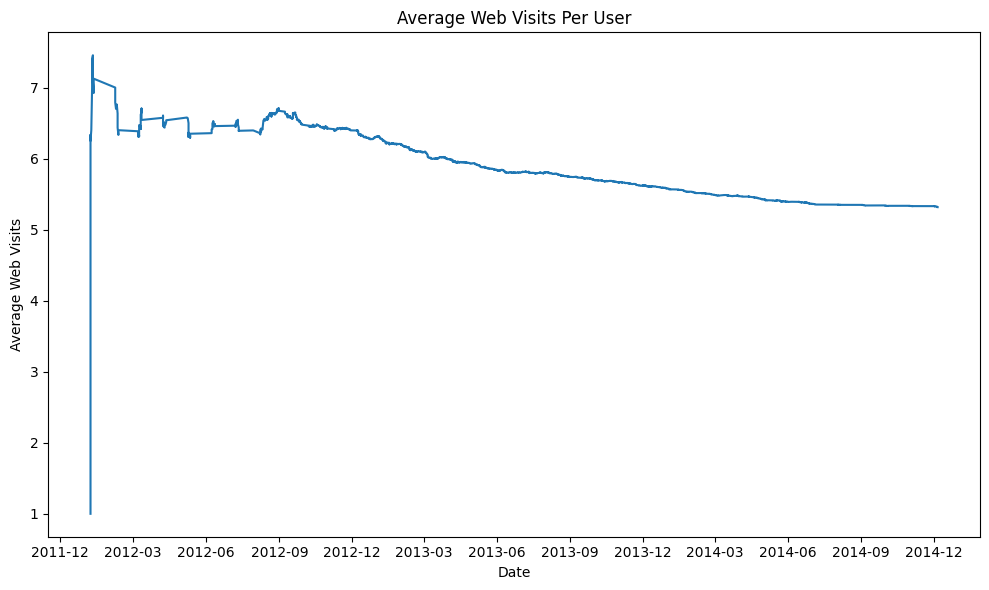

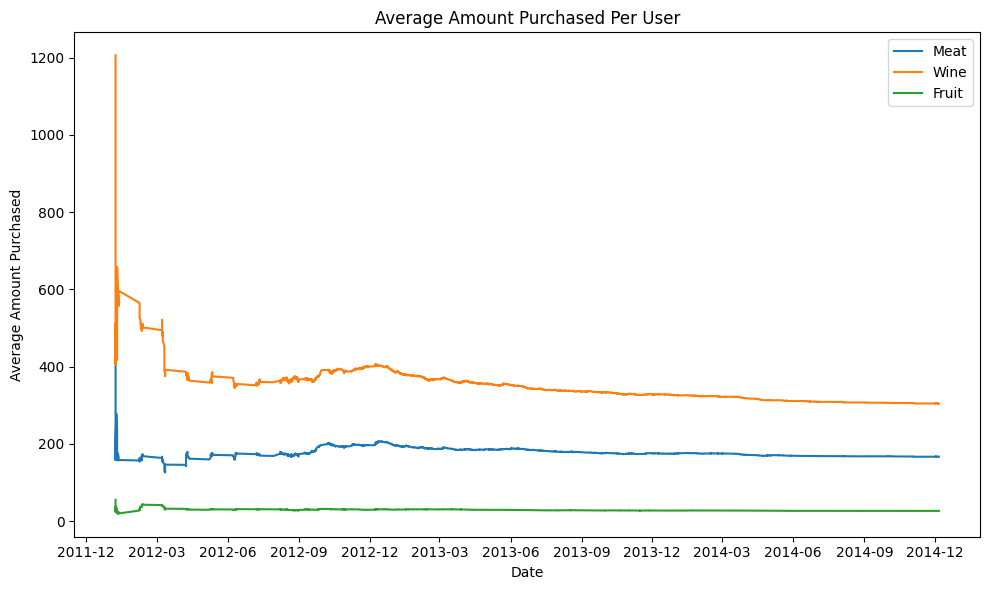

In [15]:
#Part 8 Time series behavior

plt.figure(figsize=(10, 6))
plt.plot(Dataset['Dt_Customer'], Dataset['Average_Uses'])

# Set the locator for x-axis ticks to a MonthLocator with a step of 3 months
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))

plt.xlabel('Date')
plt.ylabel('Average Web Visits')
plt.title('Average Web Visits Per User')
plt.tight_layout()
plt.savefig('Figures/Avg_WebUses.png',dpi=200)

plt.figure(figsize=(10,6))
plt.plot(Dataset['Dt_Customer'], Dataset['Average_Meat'],label='Meat')
plt.plot(Dataset['Dt_Customer'], Dataset['Average_Wine'],label='Wine')
plt.plot(Dataset['Dt_Customer'], Dataset['Average_Fruit'],label='Fruit')
# Set the locator for x-axis ticks to a MonthLocator with a step of 3 months
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))

plt.xlabel('Date')
plt.legend()
plt.ylabel('Average Amount Purchased')
plt.title('Average Amount Purchased Per User')
plt.tight_layout()
plt.savefig('Figures/Mnt_Trends.png',dpi=200)



In [16]:
Dataset.sort_values(by='Id',inplace=True)

Dataset.to_csv('Data/IDsorted.csv')
